In [1]:
from fastai.vision.all import *
import fastai
import timm
import pandas as pd

In [2]:
import torch
torch.cuda.set_device(2)

In [3]:
df = pd.read_csv('data/wheat_new.csv',decimal=',')

In [4]:
df

,Unnamed: 0,file,DAS,plot nº,photo nº,species,water_treatment,management,plot m2,avg_water (L m-2),...,P (kg microplot-1),K (kg microplot-1),avg_height,GA,GGA,CSI,NGRDIveg,TGIveg,final yield (kg),dataset
0,0,20220517_1 (1).JPG,96,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.959407,0.904393,5.734098,0.1324,2569.2709,9.15,train
1,1,20220517_1 (2).JPG,96,1,(2).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.963030,0.905523,5.971505,0.1316,2648.0105,9.15,train
2,2,20220517_1 (3).JPG,96,1,(3).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.953708,0.898722,5.765430,0.1331,2736.4337,9.15,train
3,3,20220517_1 (4).JPG,96,1,(4).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.957117,0.898772,6.095965,0.1267,2550.8238,9.15,train
4,4,20220602_1 (1).JPG,112,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.892348,0.791199,11.335180,0.1008,1880.2128,9.15,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,20220615_25 (4).JPG,125,25,(4).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.788544,0.323428,58.984136,0.0491,2277.6824,7.95,test
252,252,20220701_25 (1).JPG,141,25,(1).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.031868,0.009072,71.532905,0.0342,946.1760,7.95,test
253,253,20220701_25 (2).JPG,141,25,(2).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.025828,0.006849,73.483356,0.0314,867.4491,7.95,test
254,254,20220701_25 (3).JPG,141,25,(3).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.022065,0.004773,78.367629,0.0196,855.3556,7.95,test


In [5]:
dftrain = df[(df.dataset=='train')|(df.dataset=='validation')]
dftrain.loc[:,'dataset'] =  dftrain['dataset'].apply(lambda x: x=='validation')
df.loc[:,'dataset'] =  df['dataset'].apply(lambda x: x=='test')

In [6]:
db = DataBlock(blocks = (ImageBlock, RegressionBlock()),
                 get_x=[ColReader('file',pref='wheat_all/')],
                 get_y=[ColReader('final yield (kg)')],
                 splitter=ColSplitter(col='dataset'),    
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384,flip_vert=True,
                                            max_zoom=1.0), Normalize.from_stats(*imagenet_stats)])
dls = db.dataloaders(dftrain,bs=2)

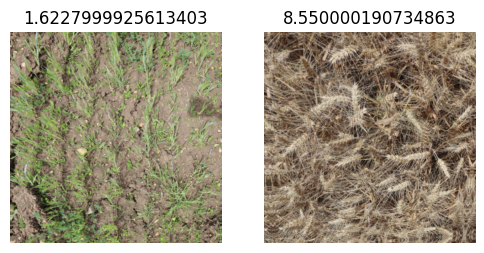

In [7]:
dls.show_batch()

In [8]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    # EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname='levit_yield')
]

In [9]:
from fastai.metrics import mae,rmse,mse

In [10]:
timm.list_models('*384*')

['beit_base_patch16_384',
 'beit_large_patch16_384',
 'cait_m36_384',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_384',
 'cait_xxs36_384',
 'convnext_base_384_in22ft1k',
 'convnext_large_384_in22ft1k',
 'convnext_small_384_in22ft1k',
 'convnext_tiny_384_in22ft1k',
 'convnext_xlarge_384_in22ft1k',
 'deit3_base_patch16_384',
 'deit3_base_patch16_384_in21ft1k',
 'deit3_large_patch16_384',
 'deit3_large_patch16_384_in21ft1k',
 'deit3_small_patch16_384',
 'deit3_small_patch16_384_in21ft1k',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_384',
 'levit_384',
 'mobilevitv2_150_384_in22ft1k',
 'mobilevitv2_175_384_in22ft1k',
 'mobilevitv2_200_384_in22ft1k',
 'resnetv2_152x2_bit_teacher_384',
 'swin_base_patch4_window12_384',
 'swin_base_patch4_window12_384_in22k',
 'swin_large_patch4_window12_384',
 'swin_large_patch4_window12_384_in22k',
 'swinv2_base_window12to24_192to384_22kft1k',
 'swinv2_cr_base_384',
 'swinv2_cr_giant_384',
 'swinv2_cr_huge_384',
 'swinv2_cr_

In [11]:
learn = Learner(dls, timm.create_model('swinv2_cr_base_384',num_classes=1,pretrained=True),
                loss_func=MSELossFlat(), metrics=[mae,rmse,mse],cbs=callbacks).to_fp16()

/opt/anaconda/envs/fastai/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
No pretrained weights exist or were found for this model. Using random initialization.


In [12]:
# learn.lr_find()

epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,18.443768,10.800001,2.953012,3.286335,10.800001,00:39


Better model found at epoch 0 with valid_loss value: 10.80000114440918.


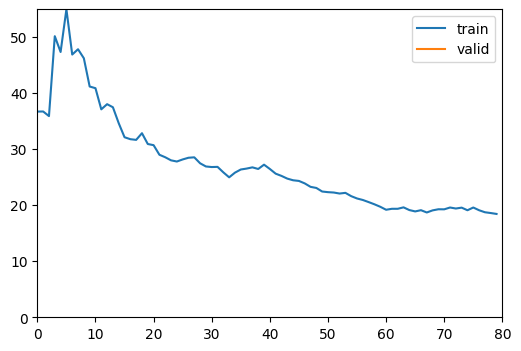

epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,11.660516,9.371622,2.612253,3.061311,9.371622,00:50
1,9.796815,8.301277,2.298232,2.881194,8.301277,02:05
2,10.316729,7.578067,2.293344,2.752829,7.578067,02:11
3,9.671504,7.627788,2.230350,2.761845,7.627788,01:12
4,9.783167,8.006408,2.294060,2.829560,8.006408,01:59
5,7.876741,7.247607,1.971136,2.692138,7.247607,01:55
6,7.047923,5.215841,1.814459,2.283822,5.215841,02:17
7,3.883425,2.382431,1.386678,1.543513,2.382431,02:28
8,1.922507,0.641035,0.693079,0.800647,0.641035,01:13
9,1.915255,1.081133,0.960595,1.039776,1.081133,01:13


Better model found at epoch 0 with valid_loss value: 9.371622085571289.


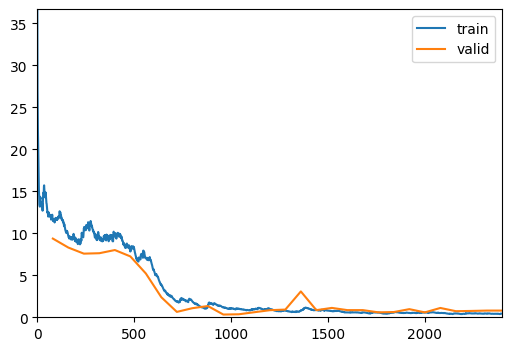

Better model found at epoch 1 with valid_loss value: 8.301277160644531.
Better model found at epoch 2 with valid_loss value: 7.578066825866699.
Better model found at epoch 5 with valid_loss value: 7.2476067543029785.
Better model found at epoch 6 with valid_loss value: 5.215840816497803.
Better model found at epoch 7 with valid_loss value: 2.3824312686920166.
Better model found at epoch 8 with valid_loss value: 0.6410350203514099.
Better model found at epoch 11 with valid_loss value: 0.3247101604938507.


In [13]:
learn.fine_tune(30,base_lr=1e-4)

In [14]:
db = DataBlock(blocks = (ImageBlock, RegressionBlock()),
                 get_x=[ColReader('file',pref='wheat_all/')],
                 get_y=[ColReader('final yield (kg)')],
                 splitter=ColSplitter(col='dataset'),    
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384,flip_vert=True,
                                            max_zoom=1.0), Normalize.from_stats(*imagenet_stats)])
dls = db.dataloaders(df,bs=8)

In [15]:
learn.dls=dls

In [16]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 1.0928828716278076.


(#4) [1.8290289640426636,1.0928828716278076,1.352415919303894,1.8290289640426636]